<a href="https://colab.research.google.com/github/arunimasundar/Hope-Speech-LT-EDI/blob/main/Malayalam/Malayalam_training_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ls

sample_data/


In [ ]:
cd drive/MyDrive/LTEDI\ again


/content/drive/.shortcut-targets-by-id/1nijN4RljX1eIK-pv4ZX6ALiGbayVeWuh/LTEDI again


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd Malayalam/

/content/drive/.shortcut-targets-by-id/1nijN4RljX1eIK-pv4ZX6ALiGbayVeWuh/LTEDI again/Malayalam


In [ ]:
! pip install simpletransformers==0.51.16 tokenizers==0.9.4

     |████████████████████████████████| 204kB 12.0MB/s 
     |████████████████████████████████| 2.9MB 24.2MB/s 
     |████████████████████████████████| 1.8MB 34.3MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 2.3MB 32.5MB/s 
     |████████████████████████████████| 1.2MB 27.2MB/s 
     |████████████████████████████████| 8.2MB 28.0MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 122kB 38.6MB/s 
     |████████████████████████████████| 102kB 11.1MB/s 
     |████████████████████████████████| 174kB 41.3MB/s 
     |████████████████████████████████| 133kB 38.7MB/s 
     |████████████████████████████████| 901kB 34.6MB/s 
     |████████████████████████████████| 4.2MB 32.5MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 112kB 39.6MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 122kB 43.1MB/s 

In [ ]:
pip install transformers -U

Requirement already up-to-date: transformers in /usr/local/lib/python3.7/dist-packages (4.6.1)
     |████████████████████████████████| 3.3MB 11.5MB/s 
  Found existing installation: tokenizers 0.9.4
    Uninstalling tokenizers-0.9.4:
      Successfully uninstalled tokenizers-0.9.4


In [ ]:
import pandas as pd

In [ ]:
ls

BILSTM-Malayalam.ipynb
LaBSE_Malayalam.ipynb
MalayalamPreprocess_Dev.ipynb
MalayalamPreprocess_Train.ipynb
preprocessed_malayalam_dev_done_beautifully.csv
preprocessed_malayalam_testGOLD_done_beautifully.csv
preprocessed_malayalam_train_done_beautifully.csv
TCN-Malayalam.ipynb


In [ ]:
df_train=pd.read_csv("preprocessed_malayalam_train_done_beautifully.csv")
df_train=df_train.drop('Unnamed: 0', axis=1)
df_train

,text,label
0,arya s nair athile karthikayude charctr bisexu...,Non_hope_speech
1,വാങ്ങിയത് എന്ത് കുന്തം ആയാലും കളയാൻ പറ്റില്ലല്...,Non_hope_speech
2,മാറുമറയ്ക്കാൻ നടത്തിയ സമരം ഒരു previlege issue...,Hope_speech
3,ഇഷാനെ കൂടുതല് കെട്ടിപിടിക്കേണ്ട ഞങ്ങൾക്കറിയാം ...,Non_hope_speech
4,ഇന്ത്യ ഇസ്‌ലാമിക രാജ്യമല്ല ഇന്ത്യൻ ഭരണഘടന മാത്...,Hope_speech
...,...,...
8559,evan eatha eee pottan oru vivaravumilla,Non_hope_speech
8560,ithinu pakaramayi upayogikkan pattunna indian ...,Non_hope_speech
8561,സാറിന് നല്ലത് വരട്ടെ,Non_hope_speech
8562,ഇങ്ങനത്തെ നല്ല നല്ല അറിവുകൾ പറഞ്ഞു തരുന്ന ഈ ഡോ...,Hope_speech


In [ ]:
df_train['text'].isnull().sum()

4

In [ ]:
rows_with_nan = []
for index, row in df_train.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [ ]:
rows_with_nan

[]

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df_train['label']= label_encoder.fit_transform(df_train['label'])
df_train

,text,label
0,arya s nair athile karthikayude charctr bisexu...,1
1,വാങ്ങിയത് എന്ത് കുന്തം ആയാലും കളയാൻ പറ്റില്ലല്...,1
2,മാറുമറയ്ക്കാൻ നടത്തിയ സമരം ഒരു previlege issue...,0
3,ഇഷാനെ കൂടുതല് കെട്ടിപിടിക്കേണ്ട ഞങ്ങൾക്കറിയാം ...,1
4,ഇന്ത്യ ഇസ്‌ലാമിക രാജ്യമല്ല ഇന്ത്യൻ ഭരണഘടന മാത്...,0
...,...,...
8559,evan eatha eee pottan oru vivaravumilla,1
8560,ithinu pakaramayi upayogikkan pattunna indian ...,1
8561,സാറിന് നല്ലത് വരട്ടെ,1
8562,ഇങ്ങനത്തെ നല്ല നല്ല അറിവുകൾ പറഞ്ഞു തരുന്ന ഈ ഡോ...,0


In [ ]:
rows_with_nan = []
for index, row in df_val.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [ ]:
rows_with_nan

[]

In [ ]:
df_val=pd.read_csv("preprocessed_malayalam_dev_done_beautifully.csv")
df_val=df_val.drop('Unnamed: 0', axis=1)
df_val

,text,label
0,ജനകീയ കോടതിയുടെ വളരെ മികച്ച എപിസോടുകളിൽ ഒന്ന് ...,Hope_speech
1,opera mini യുടെ അത്രേം വരില്ല uc,Non_hope_speech
2,മറ്റുള്ള hetero sexuals നെ പോലെ കഴിവും സംസ്ക്ക...,Hope_speech
3,mr president നിനക്ക് ഓക്കെ അത നല്ലത്,Non_hope_speech
4,rss തീവ്രവാദികൾ നേരത്തെ പദ്ധതി ഇട്ട പ്രകാരം ചൈ...,Non_hope_speech
...,...,...
1065,വാട്സ്ആപ്പ് ന് പകരം telegram app ഇത് ഇന്ത്യ യു...,Non_hope_speech
1066,അടിസ്ഥാനമായി പള്ളിപ്രമാണങ്ങൾ മാറ്റിയെഴുതേണ്ടി ...,Non_hope_speech
1067,vella samsarikumpo blu ne nokchevi kelkaatha p...,Non_hope_speech
1068,നികേഷിന്റെ വോളിൽ അമമയുടെ കൂടെ രണ്ടു പേരും നിൽക...,Non_hope_speech


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df_val['label']= label_encoder.fit_transform(df_val['label'])
df_val

,text,label
0,ജനകീയ കോടതിയുടെ വളരെ മികച്ച എപിസോടുകളിൽ ഒന്ന് ...,0
1,opera mini യുടെ അത്രേം വരില്ല uc,1
2,മറ്റുള്ള hetero sexuals നെ പോലെ കഴിവും സംസ്ക്ക...,0
3,mr president നിനക്ക് ഓക്കെ അത നല്ലത്,1
4,rss തീവ്രവാദികൾ നേരത്തെ പദ്ധതി ഇട്ട പ്രകാരം ചൈ...,1
...,...,...
1065,വാട്സ്ആപ്പ് ന് പകരം telegram app ഇത് ഇന്ത്യ യു...,1
1066,അടിസ്ഥാനമായി പള്ളിപ്രമാണങ്ങൾ മാറ്റിയെഴുതേണ്ടി ...,1
1067,vella samsarikumpo blu ne nokchevi kelkaatha p...,1
1068,നികേഷിന്റെ വോളിൽ അമമയുടെ കൂടെ രണ്ടു പേരും നിൽക...,1


In [ ]:
df_test=pd.read_csv("preprocessed_malayalam_testGOLD_done_beautifully.csv")
df_test=df_test.drop('Unnamed: 0', axis=1)
df_test

,text,label
0,അതെ അണപൊട്ടി ഒഴുകുകയാണ്,Non_hope_speech
1,കെവിൻ avde pettupoyirolling floor laughing rol...,Non_hope_speech
2,voice ullup illa daaa tayoli ath kond alle nin...,Non_hope_speech
3,albin baiju,not-Malayalam
4,respect,not-Malayalam
...,...,...
1066,ചേട്ടാ അതിന് ഇവിടെ ആരാണ് ഇന്ത്യൻ മൊബൈൽ റിവ്യൂ ...,Non_hope_speech
1067,surya ishaan,not-Malayalam
1068,ഏതാണ് ആ മൂലയിൽ ഇരിക്കുന്ന അപ്പൂപ്പൻ,Non_hope_speech
1069,ഏതാ ആ ചൊമന്ന ടി ഷർട്ടിന് മേൽ കോട്ടിട്ട വവ്വാൽ,Non_hope_speech


In [ ]:
rows_with_nan = []
for index, row in df_test.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df_test['label']= label_encoder.fit_transform(df_test['label'])
df_test

,text,label
0,അതെ അണപൊട്ടി ഒഴുകുകയാണ്,1
1,കെവിൻ avde pettupoyirolling floor laughing rol...,1
2,voice ullup illa daaa tayoli ath kond alle nin...,1
3,albin baiju,2
4,respect,2
...,...,...
1066,ചേട്ടാ അതിന് ഇവിടെ ആരാണ് ഇന്ത്യൻ മൊബൈൽ റിവ്യൂ ...,1
1067,surya ishaan,2
1068,ഏതാണ് ആ മൂലയിൽ ഇരിക്കുന്ന അപ്പൂപ്പൻ,1
1069,ഏതാ ആ ചൊമന്ന ടി ഷർട്ടിന് മേൽ കോട്ടിട്ട വവ്വാൽ,1


In [ ]:
from simpletransformers.classification import ClassificationModel

In [ ]:
bert = ClassificationModel('bert', 'setu4993/LaBSE', num_labels=3, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 3,
    # 'silent': True
})
bert.train_model(df_train)

result, model_outputs, wrong_predictions = bert.eval_model(df_val)
bads = {}
for pred in wrong_predictions:
    if pred.label in bads:
        bads[pred.label] += 1
    else:
        bads[pred.label] = 1
print("wrong predictions:")
print(str(len(wrong_predictions)) + ' wrong out of ' + str(len(df_val)))
bads

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at setu4993/LaBSE and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:395: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/8564 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/1071 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/1071 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/1071 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:975: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1070 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/134 [00:00<?, ?it/s]

wrong predictions:
163 wrong out of 1070


{0: 75, 1: 69, 2: 19}

In [ ]:
result

{'eval_loss': 0.6195118348357448, 'mcc': 0.6325614924061029}

In [ ]:
model_outputs

array([[ 5.05078125, -0.9453125 , -3.62304688],
       [-1.22363281,  5.40625   , -3.46875   ],
       [ 4.81640625, -0.4831543 , -3.99609375],
       ...,
       [ 0.03445435,  5.25      , -3.859375  ],
       [-0.71826172,  5.12890625, -3.40429688],
       [-1.65820312,  5.37890625, -2.95898438]])

In [ ]:
wrong_predictions

In [ ]:
import numpy as np
predictions=[]
for x in model_outputs:
  predictions.append(np.argmax(x))

In [ ]:
predictions

[0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(df_val['label'], predictions))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63       190
           1       0.89      0.91      0.90       784
           2       0.83      0.80      0.81        96

    accuracy                           0.85      1070
   macro avg       0.79      0.77      0.78      1070
weighted avg       0.84      0.85      0.85      1070



In [ ]:
result_test, model_outputs_test, wrong_predictions_test = bert.eval_model(df_test)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:975: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1071 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/134 [00:00<?, ?it/s]

In [ ]:
import numpy as np
predictions_test=[]
for x in model_outputs_test:
  predictions_test.append(np.argmax(x))

In [ ]:
print(classification_report(df_test['label'], predictions_test))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       194
           1       0.89      0.90      0.90       776
           2       0.86      0.73      0.79       101

    accuracy                           0.85      1071
   macro avg       0.80      0.77      0.79      1071
weighted avg       0.85      0.85      0.85      1071



In [ ]:
import pickle
Pkl_Filename = "LaBSE-malayalam.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(bert, file)

In [ ]:
ls | grep BSE

LaBSE_Malayalam.ipynb
LaBSE-malayalam.pkl


In [ ]:
import pickle
filename = "LaBSE-malayalam.pkl"  
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
result_test, model_outputs_test, wrong_predictions_test = loaded_model.eval_model(df_test)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:975: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1071 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/134 [00:00<?, ?it/s]

In [ ]:
import numpy as np
predictions_check=[]
for x in model_outputs_test:
  predictions_check.append(np.argmax(x))

In [ ]:
print(classification_report(df_test['label'], predictions_check))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       194
           1       0.89      0.90      0.90       776
           2       0.86      0.73      0.79       101

    accuracy                           0.85      1071
   macro avg       0.80      0.77      0.79      1071
weighted avg       0.85      0.85      0.85      1071



In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[132  59   3]
 [ 66 701   9]
 [  3  24  74]]


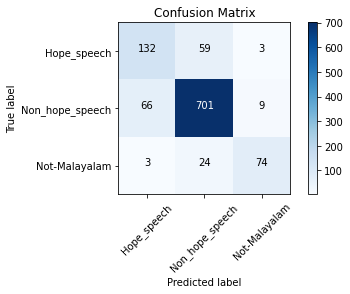

In [ ]:
plt.figure()
class_names = ['Hope_speech','Non_hope_speech','Not-Malayalam']
plot_confusion_matrix(confusion_matrix(df_test['label'], predictions_check), classes=class_names, title='Confusion Matrix')
plt.show()